## KEYSTONE PROJECT by PETER REPPEN



### Import Packages

In [44]:
# import librairies
# environment requires pip install pandas openpyxl (for excel spreadsheet)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Loading Data Files

##### US Crop Data for 2023:

- 2023 acreage data as of January 2, 2024
- Downloaded from https://www.fsa.usda.gov/tools/informational/freedom-information-act-foia/electronic-reading-room/frequently-requested/crop-acreage-data

##### US Census & USDA Data:
- Poverty estimates for the United States, States, and counties, 2023
-- U.S. Census Bureau's Small Area Income and Poverty Estimate (SAIPE) program
- Unemployment and median household income for the United States, States, and counties, 2000–23
-- source: Bureau of Labor Statistics (BLS) Local Area Unemployment Statistics (LAUS) program
- Population estimates for the United States, States, and counties, 2020–23
-- U.S. Census Bureau, Population Estimates Program: 1990–2000 intercensal tables, 2000–2010 intercensal tables, and vintage 2020 and 2023 population estimates
- Downloaded from:https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data





In [ ]:
# load data crop data (excel spreadsheet)

crop_df = pd.read_excel("../data/2023_fsa_acres_web_010224.xlsx", sheet_name='county_data')
poverty_df = pd.read_excel("../data/Poverty2023.xlsx", sheet_name='Poverty Data 2023')
pop_df = pd.read_excel("../data/PopulationEstimates.xlsx", sheet_name='Population')
unemploy_df = pd.read_excel("../data/Unemployment2023.xlsx", sheet_name='Unemployment Med HH Income')


Exploring Data

In [46]:
# exploring crops dataset

crop_df.head(10)

,State Code,County Code,Crop Code,State,County,State County Code,Crop,Crop Type,Intended Use,Irrigation Practice,Planted Acres,Volunteer Acres,Failed Acres,Prevented Acres,Not Planted Acres,Planted and Failed Acres
0,1,1,11,Alabama,Autauga,1001,WHEAT,HARD RED WINTER,Grazing,N,56.31,0.0,0.0,0.0,0.0,56.31
1,1,1,11,Alabama,Autauga,1001,WHEAT,SOFT RED WINTER,Grain,N,26.95,0.0,0.0,0.0,0.0,26.95
2,1,1,11,Alabama,Autauga,1001,WHEAT,SOFT RED WINTER,Seed,N,56.86,0.0,0.0,0.0,0.0,56.86
3,1,1,21,Alabama,Autauga,1001,"COTTON, UPLAND",NaN,Blank,I,543.57,0.0,0.0,0.0,0.0,543.57
4,1,1,21,Alabama,Autauga,1001,"COTTON, UPLAND",NaN,Blank,N,7602.81,0.0,0.0,0.0,0.0,7602.81
5,1,1,41,Alabama,Autauga,1001,CORN,"SWEET, WHITE",Fresh,N,4.00,0.0,0.0,0.0,0.0,4.00
6,1,1,41,Alabama,Autauga,1001,CORN,"SWEET, YELLOW/GOLDEN EARLY",Fresh,N,8.00,0.0,0.0,0.0,0.0,8.00
7,1,1,41,Alabama,Autauga,1001,CORN,YELLOW,Grain,I,778.49,0.0,0.0,0.0,0.0,778.49
8,1,1,41,Alabama,Autauga,1001,CORN,YELLOW,Grain,N,1184.20,0.0,0.0,0.0,0.0,1184.20
9,1,1,41,Alabama,Autauga,1001,CORN,YELLOW,Silage,N,3.82,0.0,0.0,0.0,0.0,3.82


In [47]:
# print dataset info 

crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181150 entries, 0 to 181149
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State Code                181150 non-null  int64  
 1   County Code               181150 non-null  int64  
 2   Crop Code                 181150 non-null  int64  
 3   State                     181150 non-null  object 
 4   County                    181150 non-null  object 
 5   State County Code         181150 non-null  int64  
 6   Crop                      181150 non-null  object 
 7   Crop Type                 149881 non-null  object 
 8   Intended Use              181150 non-null  object 
 9   Irrigation Practice       181150 non-null  object 
 10  Planted Acres             181150 non-null  float64
 11  Volunteer Acres           181150 non-null  float64
 12  Failed Acres              181150 non-null  float64
 13  Prevented Acres           181150 non-null  f

In [48]:
# DF rows & columns

crop_df.shape

(181150, 16)

In [49]:
# how many records are there per state?

print(crop_df['State'].value_counts())

State
Texas                         11783
Minnesota                      8989
Nebraska                       8776
Iowa                           8733
Kansas                         7455
Wisconsin                      7266
Illinois                       6825
Ohio                           6437
Indiana                        6248
Missouri                       6054
Georgia                        6015
South Dakota                   6009
North Carolina                 5974
Michigan                       5869
Montana                        5529
New York                       5178
Pennsylvania                   4729
North Dakota                   4466
Kentucky                       4371
Oklahoma                       4244
Virginia                       3713
Idaho                          3525
Colorado                       3255
Tennessee                      3122
Oregon                         3098
Alabama                        2835
California                     2743
Mississippi           

In [50]:
# use describe on a column

crop_df['Planted Acres'].describe()

count    1.811500e+05
mean     3.609453e+03
std      3.276401e+04
min      0.000000e+00
25%      5.270000e+00
50%      5.157500e+01
75%      3.819750e+02
max      2.460893e+06
Name: Planted Acres, dtype: float64

In [51]:
# identify value counts for Irrigation Practice 

print(crop_df['Irrigation Practice'].value_counts())

Irrigation Practice
N    136725
I     43222
O      1203
Name: count, dtype: int64


In [52]:
# check for duplicated records

print(crop_df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
181145    False
181146    False
181147    False
181148    False
181149    False
Length: 181150, dtype: bool


In [53]:
# max & min planted acres

print(crop_df["Planted Acres"].max(), crop_df["Planted Acres"].min())

2460892.823 0.0


In [54]:
# Group by State, aggregated mean for Planted and Failed acres

crop_state = crop_df.groupby('State').agg({
    'Planted Acres': 'mean',
    'Failed Acres': 'mean'
})

crop_state


,Planted Acres,Failed Acres
State,,
Alabama,1205.590064,0.857827
Alaska,894.194879,0.000000
Arizona,17058.494332,0.242154
Arkansas,4330.985882,12.108027
California,5171.995533,3.579340
Colorado,7526.870625,186.472442
Connecticut,97.840425,0.000000
Delaware,1609.711433,0.195202
Florida,1483.536426,0.285005


In [55]:
# identify columns with null values

print(crop_df.isna().sum())


State Code                      0
County Code                     0
Crop Code                       0
State                           0
County                          0
State County Code               0
Crop                            0
Crop Type                   31269
Intended Use                    0
Irrigation Practice             0
Planted Acres                   0
Volunteer Acres                 0
Failed Acres                    0
Prevented Acres                 0
Not Planted Acres               0
Planted and Failed Acres        0
dtype: int64


In [56]:
# replace null values in 'Crop Type' with "Unknown" - in place

crop_df['Crop Type'] = crop_df['Crop Type'].fillna('Unknown')

print(crop_df.isna().sum())

State Code                  0
County Code                 0
Crop Code                   0
State                       0
County                      0
State County Code           0
Crop                        0
Crop Type                   0
Intended Use                0
Irrigation Practice         0
Planted Acres               0
Volunteer Acres             0
Failed Acres                0
Prevented Acres             0
Not Planted Acres           0
Planted and Failed Acres    0
dtype: int64


Initial Charting

In [57]:
# Group by State, aggregated mean for Planted and Failed acres

ky_crops = crop_df.loc[crop_df['State'] == 'Kentucky']
ky_crops = ky_crops.astype({"Planted Acres": "int64"})

ky_crops.dtypes


State Code                    int64
County Code                   int64
Crop Code                     int64
State                        object
County                       object
State County Code             int64
Crop                         object
Crop Type                    object
Intended Use                 object
Irrigation Practice          object
Planted Acres                 int64
Volunteer Acres             float64
Failed Acres                float64
Prevented Acres             float64
Not Planted Acres           float64
Planted and Failed Acres    float64
dtype: object

In [58]:
# find top crops (mean)

ky_crop_mean = ky_crops.groupby('Crop')['Planted Acres'].mean().sort_values(ascending=False)

top_c = 6
top_crops = ky_crop_mean.nlargest(n=top_c)

top_crops


Crop
SOYBEANS        11714.671053
CORN             4395.118644
MIXED FORAGE     3270.684397
WHEAT            2831.705556
COVER CROP       2179.858333
IDLE              720.207921
Name: Planted Acres, dtype: float64

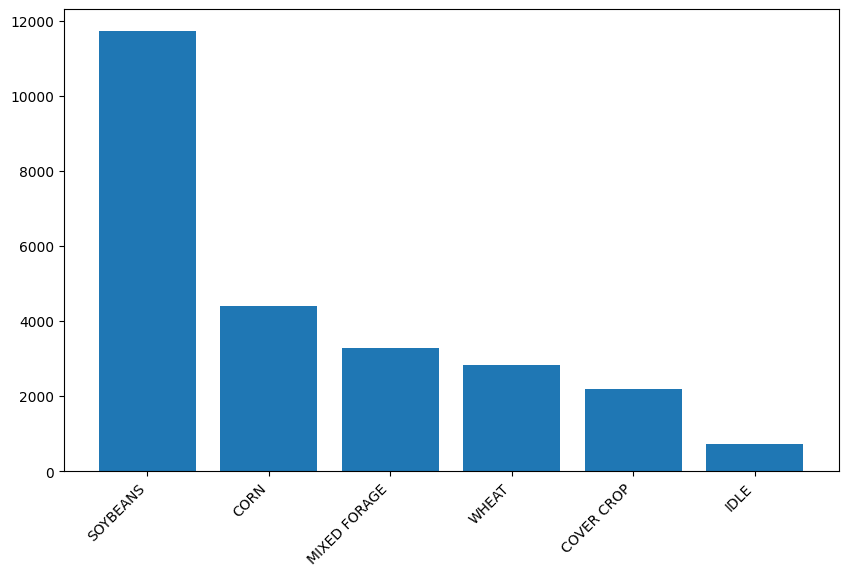

In [59]:
#create bar chart

plt.figure(figsize=(10,6))
plt.xticks(rotation=45, ha='right')
plt.bar(top_crops.index, top_crops.values)
plt.show()

In [60]:
# find top counties in KY (mean)

ky_county_mean = ky_crops.groupby('County')['Planted Acres'].mean().sort_values(ascending=False)

top_ct = 10
top_county = ky_county_mean.nlargest(n=top_ct)

top_county

County
Christian    3966.216867
Union        3818.590909
Henderson    3630.478261
Logan        3312.012500
Fulton       3105.535714
Graves       2939.012195
Ballard      2922.205128
Ohio         2914.093750
Todd         2907.464286
Daviess      2857.073529
Name: Planted Acres, dtype: float64

Chart Refinement

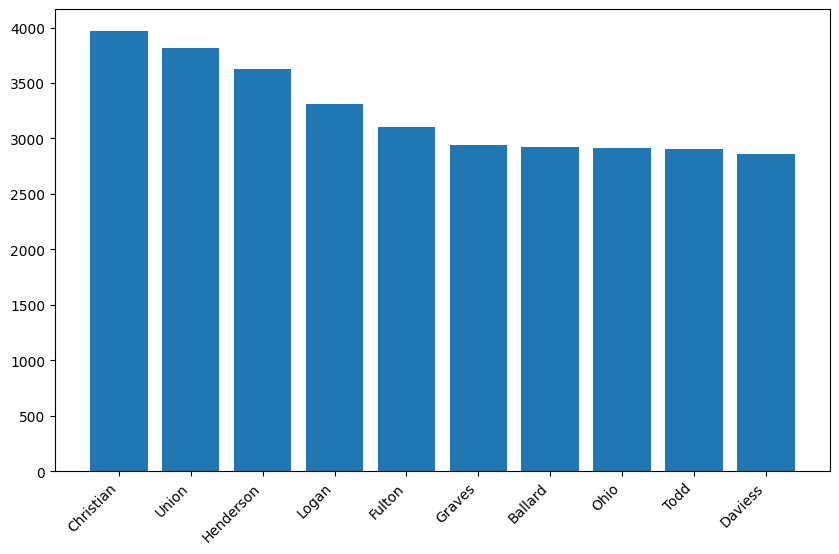

In [61]:
#create bar chart

plt.figure(figsize=(10,6))
plt.xticks(rotation=45, ha='right')
plt.bar(top_county.index, top_county.values)
plt.show()

In [62]:
# find top crops (sum)

ky_crop_sum = ky_crops.groupby('Crop')['Planted Acres'].sum().sort_values(ascending=False)

top_c = 6
top_crops = ky_crop_sum.nlargest(n=top_c)

top_crops


Crop
MIXED FORAGE    1844666
SOYBEANS        1780630
CORN            1555872
WHEAT            509707
GRASS            262408
COVER CROP       261583
Name: Planted Acres, dtype: int64

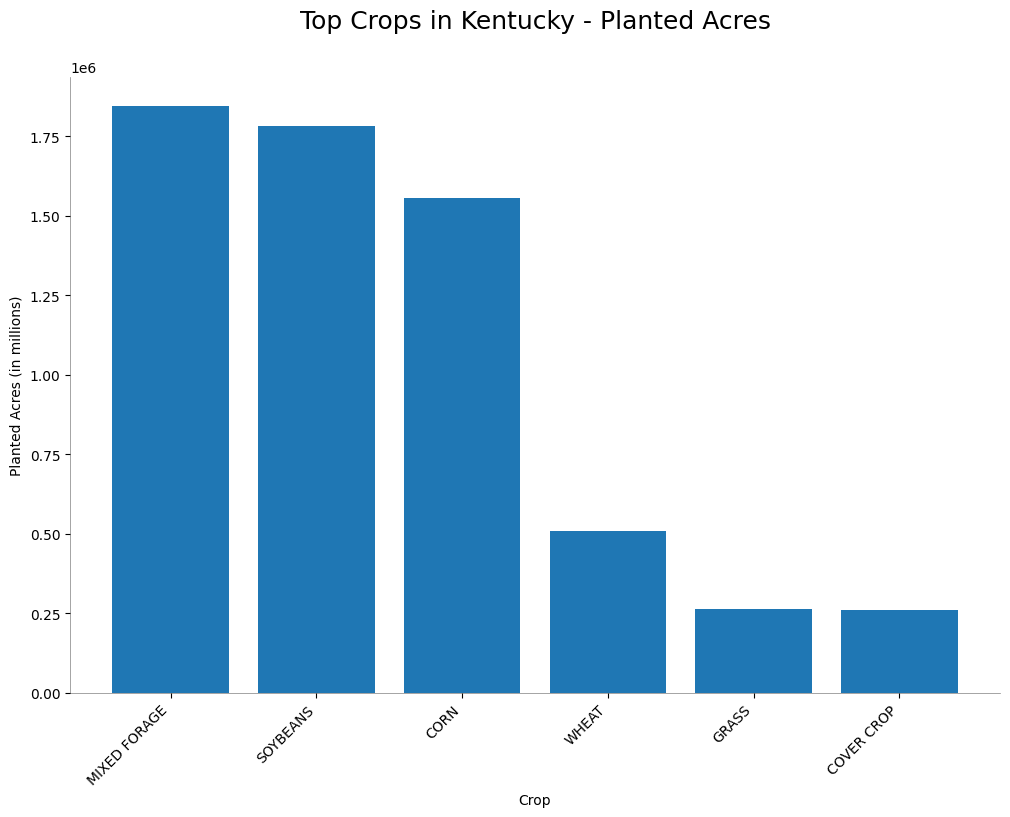

In [63]:
#create bar chart

plt.figure(figsize=(12,8))
plt.xlabel("Crop")
plt.ylabel("Planted Acres (in millions)")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Top Crops in Kentucky - Planted Acres", fontsize = 18, pad= 35)

plt.xticks(rotation=45, ha='right')
plt.bar(top_crops.index, top_crops.values)
plt.show()

In [64]:
# find top counties in KY (sum)

ky_county_sum = ky_crops.groupby('County')['Planted Acres'].sum().sort_values(ascending=False)

top_ct = 10
top_county = ky_county_sum.nlargest(n=top_ct)

top_county

County
Christian    329196
Logan        264961
Graves       240999
Daviess      194281
Union        168018
Henderson    167002
Todd         162818
Barren       140979
Simpson      140905
Warren       138218
Name: Planted Acres, dtype: int64

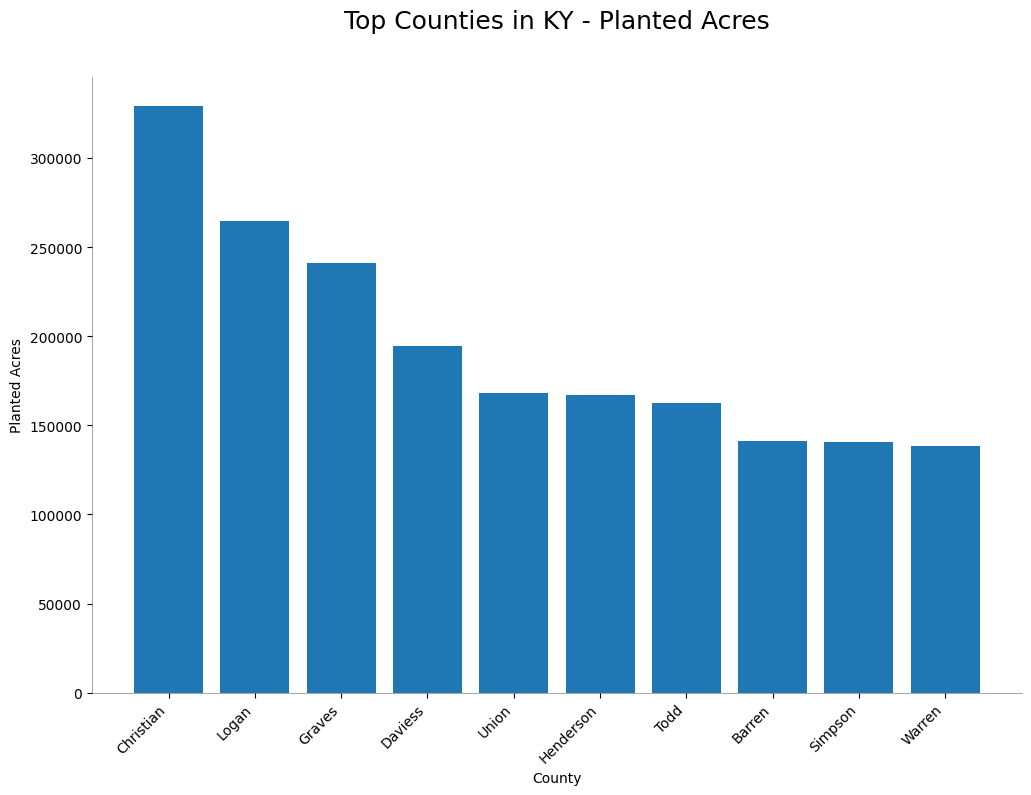

In [65]:
#create bar chart

plt.figure(figsize=(12,8))
plt.xlabel("County")
plt.ylabel("Planted Acres")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Top Counties in KY - Planted Acres", fontsize = 18, pad= 35)

plt.xticks(rotation=45, ha='right')
plt.bar(top_county.index, top_county.values)
plt.show()

#### Changing Direction (just a bit)
##### I originally stated that I wanted to analayze if there is a correlation between rural counties and poverty in Kentucky. Starting out, I found the data I needed, but was not able to find the proverty & related data again - just did on 1/17 I left the above charts, data cleaning, etc in my project to show my work, but I will take it out for the final Capstone. Now I am getting back to my original plan :)

In [66]:
ky_acres_df = ky_crops
ky_acres_df.head()

,State Code,County Code,Crop Code,State,County,State County Code,Crop,Crop Type,Intended Use,Irrigation Practice,Planted Acres,Volunteer Acres,Failed Acres,Prevented Acres,Not Planted Acres,Planted and Failed Acres
53460,21,1,1,Kentucky,Adair,21001,TOBACCO BURLEY,Unknown,Blank,N,197,0.0,0.0,0.0,0.0,197.54
53461,21,1,11,Kentucky,Adair,21001,WHEAT,SOFT RED WINTER,Forage,N,1985,0.0,0.0,0.0,0.0,1985.13
53462,21,1,11,Kentucky,Adair,21001,WHEAT,SOFT RED WINTER,Grain,N,1207,0.0,0.0,0.0,0.0,1207.38
53463,21,1,11,Kentucky,Adair,21001,WHEAT,SOFT RED WINTER,Grazing,N,14,0.0,0.0,0.0,0.0,14.73
53464,21,1,27,Kentucky,Adair,21001,ALFALFA,Unknown,Forage,N,93,0.0,0.0,0.0,0.0,93.90


In [71]:
ky_acres_df.shape

(4371, 4)

In [69]:
# Additional data cleanup

# drop duplicates
ky_acres_df.drop_duplicates(keep="first", inplace=True)

# dropping unncessary columns from rural_df
ky_acres_df.drop(columns=['State Code', 'County Code', 'Crop Code', 'Crop', 'Crop Type', 'Intended Use',
       'Irrigation Practice', 'Planted Acres', 'Volunteer Acres',
       'Failed Acres', 'Prevented Acres', 'Not Planted Acres'], inplace=True)


In [89]:
ky_acres_df.head()

,State,County,State County Code,Planted and Failed Acres
53460,Kentucky,Adair,21001,197.54
53461,Kentucky,Adair,21001,1985.13
53462,Kentucky,Adair,21001,1207.38
53463,Kentucky,Adair,21001,14.73
53464,Kentucky,Adair,21001,93.90


In [101]:
# aggregating (sum) of all rows by county

rural_acres = ky_crops.groupby('State County Code')['Planted and Failed Acres'].sum().sort_values(ascending=False)
rural_acres 

county_acres_df = pd.DataFrame(rural_acres)
county_acres_df

,Planted and Failed Acres
State County Code,
21047,329558.1505
21141,265008.3200
21083,241070.9450
21059,194514.1600
21225,168036.8900
...,...
21095,163.9500
21193,39.8100
21133,22.8100


#### Working with the Census & USDA DataFrames
##### 1-2 columns from each of the poverty_df, unemploy_df, and pop_df dataframes will get appended to the new rural_df

In [154]:
state_poverty_df = poverty_df.loc[poverty_df['Stabr'] == 'KY']
state_pop_df = pop_df.loc[pop_df['State'] == 'KY']
state_unemploy_df = unemploy_df.loc[unemploy_df['State'] == 'KY']
state_unemploy_df.head()

,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2023,Urban_Influence_Code_2013,Metro_2023,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Civilian_labor_force_2023,Employed_2023,Unemployed_2023,Unemployment_rate_2023,Median_Household_Income_2022,Med_HH_Income_Percent_of_State_Total_2022
1024,21000,KY,Kentucky,NaN,NaN,NaN,1957400.0,1876232.0,81168.0,4.1,...,2030274.0,1948312.0,81962.0,4.0,2026263.0,1941994.0,84269.0,4.2,59246.0,100.0
1025,21001,KY,"Adair County, KY",7.0,9.0,0.0,8203.0,7794.0,409.0,5.0,...,7139.0,6802.0,337.0,4.7,7216.0,6853.0,363.0,5.0,44153.0,74.5
1026,21003,KY,"Allen County, KY",3.0,2.0,1.0,8479.0,8111.0,368.0,4.3,...,8878.0,8522.0,356.0,4.0,8918.0,8562.0,356.0,4.0,61655.0,104.1
1027,21005,KY,"Anderson County, KY",6.0,3.0,0.0,10199.0,9853.0,346.0,3.4,...,11905.0,11517.0,388.0,3.3,12026.0,11627.0,399.0,3.3,66846.0,112.8
1028,21007,KY,"Ballard County, KY",3.0,8.0,1.0,4221.0,3972.0,249.0,5.9,...,3464.0,3291.0,173.0,5.0,3459.0,3290.0,169.0,4.9,56605.0,95.5


In [155]:
ky_pop_df = state_pop_df.drop(columns=['Rural_Urban_Continuum_Code_2013',
       'Rural_Urban_Continuum_Code_2023', 'Urban_Influence_2013',
       'Economic_typology_2015', 'CENSUS_2020_POP', 'ESTIMATES_BASE_2020',
       'POP_ESTIMATE_2020', 'POP_ESTIMATE_2021', 'POP_ESTIMATE_2022', 'N_POP_CHG_2020', 'N_POP_CHG_2021',
       'N_POP_CHG_2022', 'N_POP_CHG_2023', 'BIRTHS_2020', 'BIRTHS_2021',
       'BIRTHS_2022', 'BIRTHS_2023', 'DEATHS_2020', 'DEATHS_2021',
       'DEATHS_2022', 'DEATHS_2023', 'NATURAL_CHG_2020', 'NATURAL_CHG_2021',
       'NATURAL_CHG_2022', 'NATURAL_CHG_2023', 'INTERNATIONAL_MIG_2020',
       'INTERNATIONAL_MIG_2021', 'INTERNATIONAL_MIG_2022',
       'INTERNATIONAL_MIG_2023', 'DOMESTIC_MIG_2020', 'DOMESTIC_MIG_2021',
       'DOMESTIC_MIG_2022', 'DOMESTIC_MIG_2023', 'NET_MIG_2020',
       'NET_MIG_2021', 'NET_MIG_2022', 'NET_MIG_2023', 'RESIDUAL_2020',
       'RESIDUAL_2021', 'RESIDUAL_2022', 'RESIDUAL_2023',
       'GQ_ESTIMATES_BASE_2020', 'GQ_ESTIMATES_2020', 'GQ_ESTIMATES_2021',
       'GQ_ESTIMATES_2022', 'GQ_ESTIMATES_2023', 'R_BIRTH_2021',
       'R_BIRTH_2022', 'R_BIRTH_2023', 'R_DEATH_2021', 'R_DEATH_2022',
       'R_DEATH_2023', 'R_NATURAL_CHG_2021', 'R_NATURAL_CHG_2022',
       'R_NATURAL_CHG_2023', 'R_INTERNATIONAL_MIG_2021',
       'R_INTERNATIONAL_MIG_2022', 'R_INTERNATIONAL_MIG_2023',
       'R_DOMESTIC_MIG_2021', 'R_DOMESTIC_MIG_2022', 'R_DOMESTIC_MIG_2023',
       'R_NET_MIG_2021', 'R_NET_MIG_2022', 'R_NET_MIG_2023'])

ky_poverty_df = state_poverty_df.drop(columns=['Rural_Urban_Continuum_Code_2013',
       'Urban_Influence_Code_2013', 'Rural_Urban_Continuum_Code_2023',
       'Urban_Influence_Code_2024', 'CI90LBALL_2023',
       'CI90UBALL_2023',  'CI90LBALLP_2023',
       'CI90UBALLP_2023', 'POV017_2023', 'CI90LB017_2023', 'CI90UB017_2023',
       'PCTPOV017_2023', 'CI90LB017P_2023', 'CI90UB017P_2023', 'POV517_2023',
       'CI90LB517_2023', 'CI90UB517_2023', 'PCTPOV517_2023', 'CI90LB517P_2023',
       'CI90UB517P_2023', 'MEDHHINC_2023', 'CI90LBINC_2023', 'CI90UBINC_2023',
       'POV04_2023', 'CI90LB04_2023', 'CI90UB04_2023', 'PCTPOV04_2023',
       'CI90LB04P_2023', 'CI90UB04P_2023'])

ky_unemploy_df = state_unemploy_df.drop(columns=['Rural_Urban_Continuum_Code_2023','Urban_Influence_Code_2013', 'Metro_2023', 
       'Civilian_labor_force_2000', 'Employed_2000', 'Unemployed_2000', 'Unemployment_rate_2000','Civilian_labor_force_2001', 
       'Employed_2001', 'Unemployed_2001', 'Unemployment_rate_2001', 'Civilian_labor_force_2002', 'Employed_2002', 
       'Unemployed_2002', 'Unemployment_rate_2002', 'Civilian_labor_force_2022', 'Employed_2022', 'Unemployed_2022',
       'Unemployment_rate_2022', 'Civilian_labor_force_2023', 'Median_Household_Income_2022',
       'Med_HH_Income_Percent_of_State_Total_2022','Civilian_labor_force_2003', 'Employed_2003', 
       'Unemployed_2003', 'Unemployment_rate_2003', 'Civilian_labor_force_2004', 'Employed_2004', 'Unemployed_2004', 
       'Unemployment_rate_2004', 'Civilian_labor_force_2005', 'Employed_2005', 'Unemployed_2005', 
       'Unemployment_rate_2005', 'Civilian_labor_force_2006', 'Employed_2006', 'Unemployed_2006', 
       'Unemployment_rate_2006', 'Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007', 
       'Unemployment_rate_2007', 'Civilian_labor_force_2008', 'Employed_2008', 'Unemployed_2008', 
       'Unemployment_rate_2008', 'Civilian_labor_force_2009', 'Employed_2009', 'Unemployed_2009', 
       'Unemployment_rate_2009', 'Civilian_labor_force_2010', 'Employed_2010', 'Unemployed_2010', 
       'Unemployment_rate_2010', 'Civilian_labor_force_2011', 'Employed_2011', 'Unemployed_2011', 
       'Unemployment_rate_2011', 'Civilian_labor_force_2012', 'Employed_2012', 'Unemployed_2012', 
       'Unemployment_rate_2012', 'Civilian_labor_force_2013', 'Employed_2013', 'Unemployed_2013', 
       'Unemployment_rate_2013', 'Civilian_labor_force_2014', 'Employed_2014', 'Unemployed_2014', 
       'Unemployment_rate_2014', 'Civilian_labor_force_2015', 'Employed_2015', 'Unemployed_2015', 
       'Unemployment_rate_2015', 'Civilian_labor_force_2016', 'Employed_2016', 'Unemployed_2016', 
       'Unemployment_rate_2016', 'Civilian_labor_force_2017', 'Employed_2017', 'Unemployed_2017', 
       'Unemployment_rate_2017', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 
       'Unemployment_rate_2018', 'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019', 
       'Unemployment_rate_2019', 'Civilian_labor_force_2020', 'Employed_2020', 'Unemployed_2020', 
       'Unemployment_rate_2020', 'Civilian_labor_force_2021', 'Employed_2021', 'Unemployed_2021', 
       'Unemployment_rate_2021'])

In [171]:
ky_pop_df.rename({'FIPStxt': 'FIPS_Code'}, axis=1, inplace=True)
ky_pop_df.head()

,FIPS_Code,State,Area_Name,POP_ESTIMATE_2023
1021,21000,KY,Kentucky,4526154.0
1022,21001,KY,Adair County,19264.0
1023,21003,KY,Allen County,21788.0
1024,21005,KY,Anderson County,24613.0
1025,21007,KY,Ballard County,7582.0


In [157]:
ky_poverty_df.head()

,FIPS_Code,Stabr,Area_Name,POVALL_2023,PCTPOVALL_2023
1013,21000,KY,Kentucky,709405.0,16.1
1014,21001,KY,Adair County,3978.0,22.1
1015,21003,KY,Allen County,3549.0,16.4
1016,21005,KY,Anderson County,2200.0,9.0
1017,21007,KY,Ballard County,1075.0,14.4


In [158]:
ky_unemploy_df.head()

,FIPS_Code,State,Area_Name,Employed_2023,Unemployed_2023,Unemployment_rate_2023
1024,21000,KY,Kentucky,1941994.0,84269.0,4.2
1025,21001,KY,"Adair County, KY",6853.0,363.0,5.0
1026,21003,KY,"Allen County, KY",8562.0,356.0,4.0
1027,21005,KY,"Anderson County, KY",11627.0,399.0,3.3
1028,21007,KY,"Ballard County, KY",3290.0,169.0,4.9


In [176]:
# Cleaning up the county acre data

county_acres_df.rename({'Planted and Failed Acres': 'Farming Acres'}, axis=1, inplace=True)
county_acres_df = county_acres_df.astype({"Farming Acres": "int64"})
ky_farm_acres = county_acres_df.reset_index()
ky_farm_acres.rename({'State County Code': 'FIPS_Code'}, axis=1, inplace=True)

ky_farm_acres.head()

,FIPS_Code,Farming Acres
0,21047,329558
1,21141,265008
2,21083,241070
3,21059,194514
4,21225,168036


#### Combining all of the data frames with select columns

In [225]:
ky_mrg_df1 = pd.merge(ky_poverty_df, ky_pop_df, on='FIPS_Code', how='inner')
ky_mrg_df2 = pd.merge(ky_mrg_df1, ky_unemploy_df, on='FIPS_Code', how='inner')
ky_mrg_df3 = pd.merge(ky_mrg_df2, ky_farm_acres, on='FIPS_Code', how='left')


ky_rural_df = ky_mrg_df3.drop(ky_mrg_df3.index[0]) # dropping a row for "Kentucky" (not a county)
ky_rural_df.head()


,FIPS_Code,Stabr,Area_Name_x,POVALL_2023,PCTPOVALL_2023,State_x,Area_Name_y,POP_ESTIMATE_2023,State_y,Area_Name,Employed_2023,Unemployed_2023,Unemployment_rate_2023,Farming Acres
1,21001,KY,Adair County,3978.0,22.1,KY,Adair County,19264.0,KY,"Adair County, KY",6853.0,363.0,5.0,92436.0
2,21003,KY,Allen County,3549.0,16.4,KY,Allen County,21788.0,KY,"Allen County, KY",8562.0,356.0,4.0,87129.0
3,21005,KY,Anderson County,2200.0,9.0,KY,Anderson County,24613.0,KY,"Anderson County, KY",11627.0,399.0,3.3,10870.0
4,21007,KY,Ballard County,1075.0,14.4,KY,Ballard County,7582.0,KY,"Ballard County, KY",3290.0,169.0,4.9,113980.0
5,21009,KY,Barren County,7951.0,18.0,KY,Barren County,45008.0,KY,"Barren County, KY",16899.0,776.0,4.4,141003.0


In [226]:
# confirming that the row count = 120 (KY has 120 counties)

ky_rural_df.shape 

(120, 14)

In [227]:
# identifying null data in "Farming Acres"
print(ky_rural_df.isna().sum())

FIPS_Code                 0
Stabr                     0
Area_Name_x               0
POVALL_2023               0
PCTPOVALL_2023            0
State_x                   0
Area_Name_y               0
POP_ESTIMATE_2023         0
State_y                   0
Area_Name                 0
Employed_2023             0
Unemployed_2023           0
Unemployment_rate_2023    0
Farming Acres             3
dtype: int64


In [229]:
# filling null fields with '0'

ky_rural_df['Farming Acres'] = ky_rural_df['Farming Acres'].fillna(0)

print(ky_rural_df.isna().sum())

FIPS_Code                 0
Stabr                     0
Area_Name_x               0
POVALL_2023               0
PCTPOVALL_2023            0
State_x                   0
Area_Name_y               0
POP_ESTIMATE_2023         0
State_y                   0
Area_Name                 0
Employed_2023             0
Unemployed_2023           0
Unemployment_rate_2023    0
Farming Acres             0
dtype: int64


In [230]:
# remove duplicate columns

ky_rural_df.drop(columns=['Stabr', 'State_x', 'Area_Name_y', 'State_y', 'Area_Name'], inplace=True)

ky_rural_df.rename({'Area_Name_x': 'County', 'POVALL_2023': 'Num in Poverty', 'PCTPOVALL_2023': 'Poverty Rate',
                    'POP_ESTIMATE_2023': 'Population', 'Employed_2023': 'Num Employed', 'Unemployed_2023': 'Unemployed',
                    'Unemployment_rate_2023': 'Unemployment Rate'}, axis=1, inplace=True)

ky_rural_df = ky_rural_df.astype({"Num in Poverty": "int64", "Population": "int64", "Num Employed": "int64", "Unemployed": "int64", "Farming Acres": "int64"})

ky_rural_df.dtypes


FIPS_Code              int64
County                object
Num in Poverty         int64
Poverty Rate         float64
Population             int64
Num Employed           int64
Unemployed             int64
Unemployment Rate    float64
Farming Acres          int64
dtype: object

#### Prep for Visualizations

In [237]:
# sorting the dataframe and reseting the index

ky_rural_sorted_df = ky_rural_df.sort_values(by='Farming Acres', ascending=False).reset_index(drop=True)
ky_rural_sorted_df

,FIPS_Code,County,Num in Poverty,Poverty Rate,Population,Num Employed,Unemployed,Unemployment Rate,Farming Acres
0,21047,Christian County,11900,17.8,72032,23327,1246,5.1,329558
1,21141,Logan County,4137,14.8,28283,11627,499,4.1,265008
2,21083,Graves County,6322,17.6,36461,14741,646,4.2,241070
3,21059,Daviess County,16349,16.2,103458,42641,1922,4.3,194514
4,21225,Union County,1866,14.5,13106,5546,283,4.9,168036
...,...,...,...,...,...,...,...,...,...
115,21195,Pike County,12737,23.4,55973,17828,1070,5.7,16
116,21071,Floyd County,9052,26.5,34423,10222,651,6.0,2
117,21159,Martin County,4492,48.1,10928,2015,183,8.3,0
118,21119,Knott County,3401,26.1,13659,3972,284,6.7,0


In [238]:
# Determine top 7 counties based on "Farming Acres"

top7_rural_cty = ky_rural_sorted_df.head(7)
top7_rural_cty

,FIPS_Code,County,Num in Poverty,Poverty Rate,Population,Num Employed,Unemployed,Unemployment Rate,Farming Acres
0,21047,Christian County,11900,17.8,72032,23327,1246,5.1,329558
1,21141,Logan County,4137,14.8,28283,11627,499,4.1,265008
2,21083,Graves County,6322,17.6,36461,14741,646,4.2,241070
3,21059,Daviess County,16349,16.2,103458,42641,1922,4.3,194514
4,21225,Union County,1866,14.5,13106,5546,283,4.9,168036
5,21101,Henderson County,5699,13.2,44119,19378,804,4.0,167017
6,21219,Todd County,2011,16.3,12494,5476,214,3.8,162841


In [251]:
# Determine bottom 7 counties based on "Farming Acres"

bot7_rural_cty = ky_rural_sorted_df.tail(7)
bot7_rural_cty

,FIPS_Code,County,Num in Poverty,Poverty Rate,Population,Num Employed,Unemployed,Unemployment Rate,Farming Acres
113,21193,Perry County,7849,29.7,27133,7535,447,5.6,39
114,21133,Letcher County,4794,23.8,20423,5586,373,6.3,22
115,21195,Pike County,12737,23.4,55973,17828,1070,5.7,16
116,21071,Floyd County,9052,26.5,34423,10222,651,6.0,2
117,21159,Martin County,4492,48.1,10928,2015,183,8.3,0
118,21119,Knott County,3401,26.1,13659,3972,284,6.7,0
119,21131,Leslie County,2541,26.7,9864,2331,173,6.9,0


In [252]:
ky_poverty_sorted_df = ky_rural_df.sort_values(by='Poverty Rate', ascending=False).reset_index(drop=True)
ky_poverty_sorted_df

,FIPS_Code,County,Num in Poverty,Poverty Rate,Population,Num Employed,Unemployed,Unemployment Rate,Farming Acres
0,21159,Martin County,4492,48.1,10928,2015,183,8.3,0
1,21051,Clay County,6673,37.2,19648,4748,323,6.4,2700
2,21147,McCreary County,5471,35.9,17050,4363,275,5.9,4570
3,21121,Knox County,10115,35.0,29794,9210,572,5.8,6694
4,21189,Owsley County,1294,33.1,4001,1018,72,6.6,950
...,...,...,...,...,...,...,...,...,...
115,21005,Anderson County,2200,9.0,24613,11627,399,3.3,10870
116,21029,Bullitt County,7130,8.4,84863,40677,1729,4.1,8937
117,21015,Boone County,10333,7.4,140496,68936,2542,3.6,14521
118,21215,Spencer County,1426,7.0,20531,10029,385,3.7,18142


In [259]:
# Determine top 7 counties based on "Poverty Rate"

top7_poverty_cty = ky_poverty_sorted_df.head(7)
top7_poverty_cty

,FIPS_Code,County,Num in Poverty,Poverty Rate,Population,Num Employed,Unemployed,Unemployment Rate,Farming Acres
0,21159,Martin County,4492,48.1,10928,2015,183,8.3,0
1,21051,Clay County,6673,37.2,19648,4748,323,6.4,2700
2,21147,McCreary County,5471,35.9,17050,4363,275,5.9,4570
3,21121,Knox County,10115,35.0,29794,9210,572,5.8,6694
4,21189,Owsley County,1294,33.1,4001,1018,72,6.6,950
5,21129,Lee County,1918,31.1,7293,2030,125,5.8,356
6,21025,Breathitt County,3850,30.3,12953,2917,238,7.5,1284


In [260]:
# Determine bottom 7 counties based on "Poverty"

bot7_poverty_cty = ky_poverty_sorted_df.tail(7)
bot7_poverty_cty

,FIPS_Code,County,Num in Poverty,Poverty Rate,Population,Num Employed,Unemployed,Unemployment Rate,Farming Acres
113,21037,Campbell County,9417,10.3,93702,48376,1824,3.6,2174
114,21209,Scott County,5883,10.0,60168,29308,1014,3.3,26211
115,21005,Anderson County,2200,9.0,24613,11627,399,3.3,10870
116,21029,Bullitt County,7130,8.4,84863,40677,1729,4.1,8937
117,21015,Boone County,10333,7.4,140496,68936,2542,3.6,14521
118,21215,Spencer County,1426,7.0,20531,10029,385,3.7,18142
119,21185,Oldham County,3801,5.8,70183,31725,1111,3.4,16581


#### Visualizations

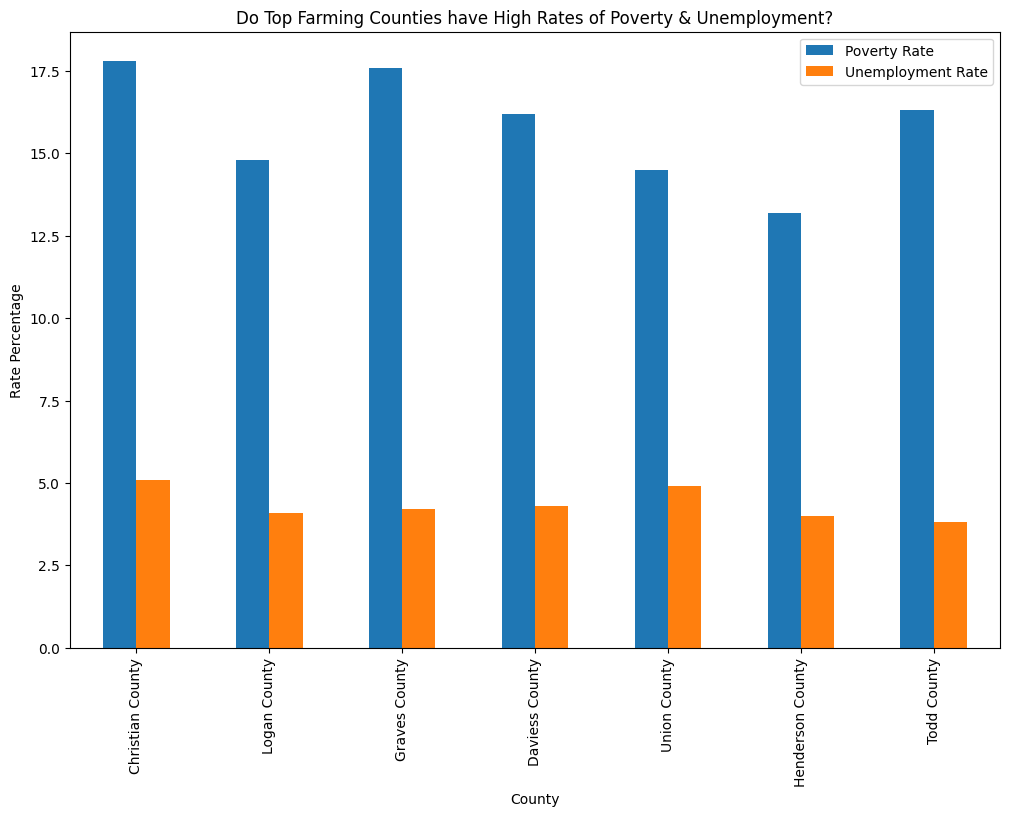

In [297]:
# Comparing Poverty Rates and Unemployment Rates for the Top 7 Farming Counties 

top7_rural_cty.plot.bar(x="County", y=["Poverty Rate", "Unemployment Rate"], figsize=(12,8),
                        title="Do Top Farming Counties have High Rates of Poverty & Unemployment?",
                        ylabel="Rate Percentage")

plt.savefig('../plots/Top Farming Counties Poverty and Unemployment Rates')

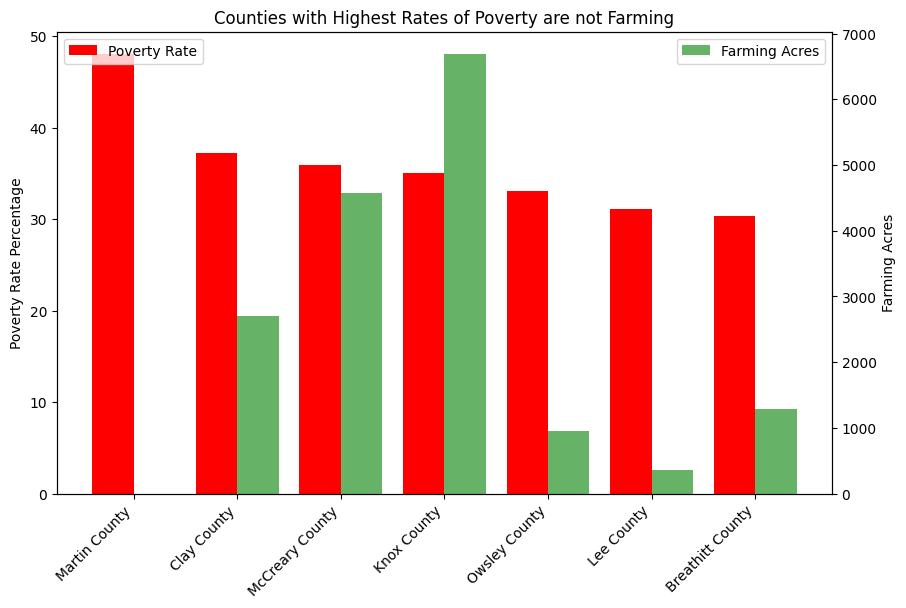

<Figure size 640x480 with 0 Axes>

In [295]:

fig, ax1 = plt.subplots(figsize=(10, 6))

width = 0.4
x_pos = np.arange(len(top7_poverty_cty['County']))

ax1.bar(x_pos - width/2, top7_poverty_cty['Poverty Rate'], width=width, color='red', label='Poverty Rate')
# ax1.set_xlabel('County')
ax1.set_ylabel('Poverty Rate Percentage')
ax1.legend(loc='upper left')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(top7_poverty_cty['County'], rotation=45, ha='right')


ax2 = ax1.twinx()
ax2.bar(x_pos + width/2, top7_poverty_cty['Farming Acres'], width=width, color='green', label='Farming Acres', alpha=0.6)
ax2.set_ylabel('Farming Acres')
ax2.legend(loc='upper right')


plt.title('Counties with Highest Rates of Poverty are not Farming')


plt.show()

plt.savefig('../plots/Counties with High Poverty Rates')

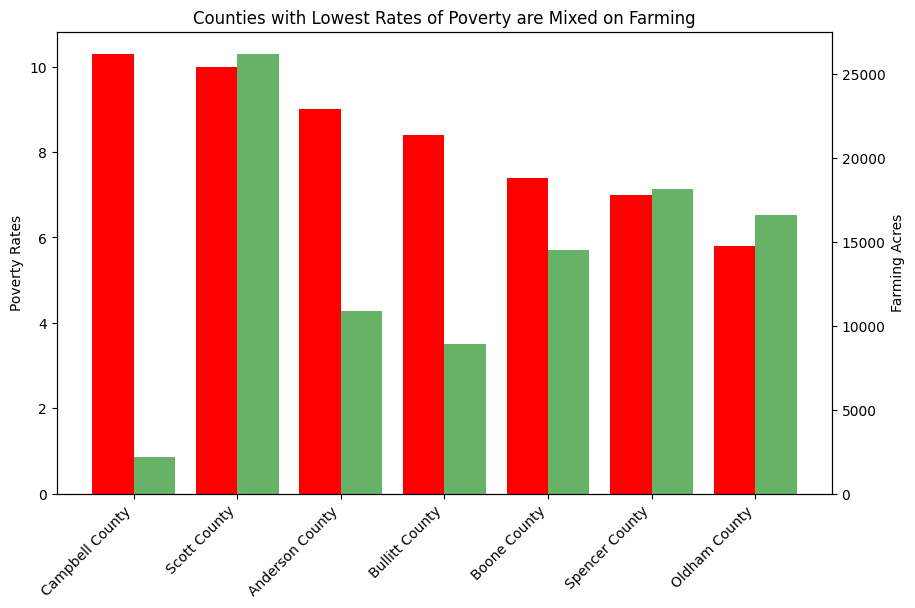

<Figure size 640x480 with 0 Axes>

In [296]:
# 
fig, ax1 = plt.subplots(figsize=(10, 6))

width = 0.4
x_pos = np.arange(len(bot7_poverty_cty['County']))

ax1.bar(x_pos - width/2, bot7_poverty_cty['Poverty Rate'], width=width, color='red', label='Poverty Rate')
ax1.set_ylabel('Poverty Rates')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(bot7_poverty_cty['County'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.bar(x_pos + width/2, bot7_poverty_cty['Farming Acres'], width=width, color='green', label='Farming Acres', alpha=0.6)
ax2.set_ylabel('Farming Acres')

plt.title('Counties with Lowest Rates of Poverty are Mixed on Farming')
plt.show()

plt.savefig('../plots/Counties with High Poverty Rates not Farming')